In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer #importing necessary libraries 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('HousePricePred.csv') # reading the data

### EDA

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
df.isnull().sum().sum()

6965

In [7]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [8]:
df.describe() # we can find outliers here itself by checking difference between median and mean

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


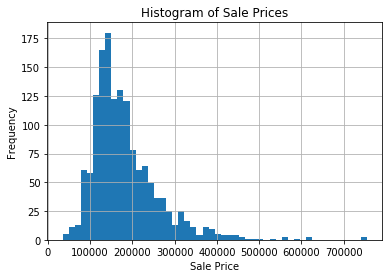

In [9]:
df['SalePrice'].hist(bins=50)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Histogram of Sale Prices')
plt.show() # This will help you identify if the target variable is normally distributed or if it has any outliers.

In [10]:
df = df.drop(['Alley','PoolQC','MiscFeature','Fence','GarageFinish','GarageFinish','Utilities','Condition1','Condition2','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtUnfSF','KitchenQual','KitchenQual','YrSold','SaleType'],axis = 1) 
# Dropping unnecessary columns along with columns having more than 80% null values

In [11]:
df.shape

(1460, 66)

In [12]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0]) # counting number of null values in each column

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtExposure     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageQual       81
GarageCond       81
dtype: int64


In [13]:
num=df._get_numeric_data() 
num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,250000


In [14]:
cat=df.drop(num,axis=1)
cat=cat.astype('category')
cat.head() # Taking numerical columns and categorical columns

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,RoofStyle,...,HeatingQC,CentralAir,Electrical,Functional,FireplaceQu,GarageType,GarageQual,GarageCond,PavedDrive,SaleCondition
0,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,NaN,Attchd,TA,TA,Y,Normal
1,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,1Fam,1Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal
2,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal
3,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,1Fam,2Story,Gable,...,Gd,Y,SBrkr,Typ,Gd,Detchd,TA,TA,Y,Abnorml
4,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal


In [15]:
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(num) # used simple imputer to fill null values by mean strategy

In [16]:
num1=pd.DataFrame(imputed_data,columns=num.columns)
num1.head() # converting array into dataframe

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,250000.0


Text(0, 0.5, 'SalePrice')

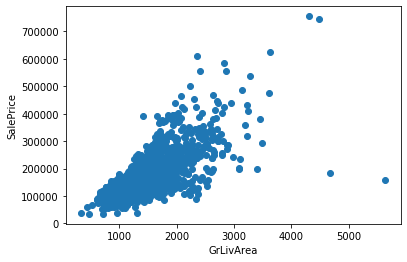

In [17]:
import seaborn as sns
plt.scatter(num1['GrLivArea'], num1['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice') #This will help you identify if there is a linear relationship between these two variables.

Text(0, 0.5, 'Sale Price')

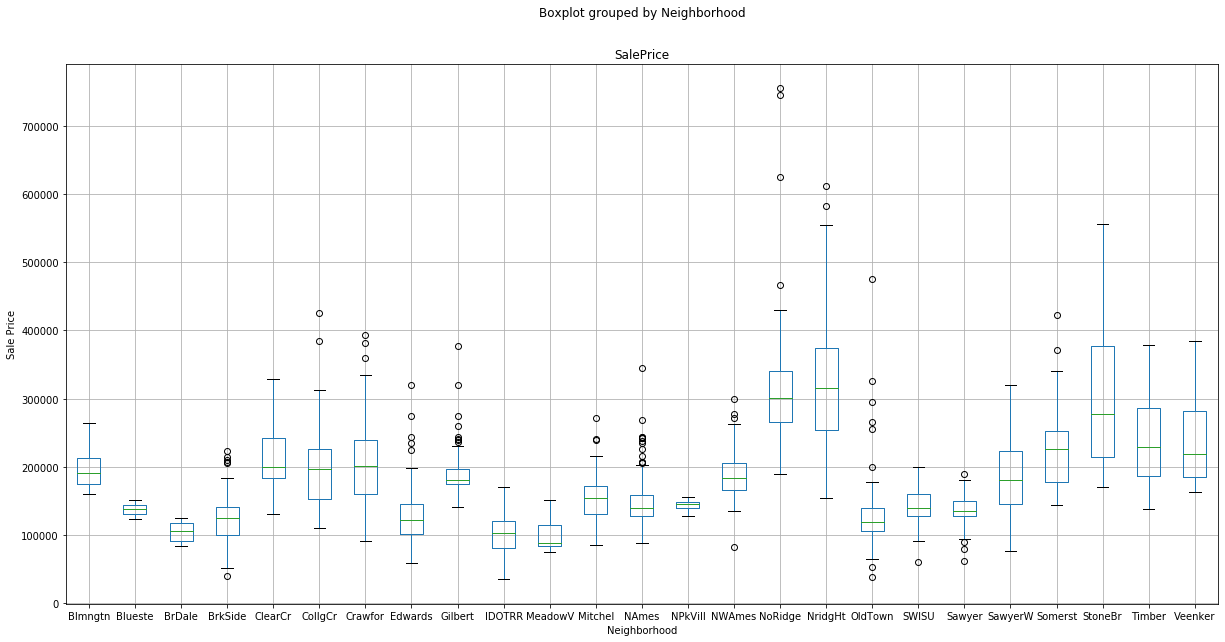

In [18]:
df.boxplot(column='SalePrice', by='Neighborhood', figsize=(20, 10))
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price') #This will help you identify if there are any significant differences in sale prices between neighborhoods.

Text(0, 0.5, 'Sale Price')

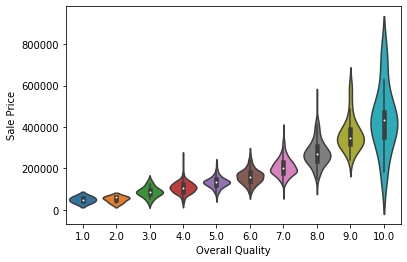

In [19]:
sns.violinplot(x='OverallQual', y='SalePrice', data=num1, scale='width')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price') 

In [20]:
imputer1 = SimpleImputer(strategy='most_frequent')
imputed_data1 = imputer1.fit_transform(cat)
# used simple imputer to fill null values by mode strategy

In [21]:
cat1= pd.DataFrame(imputed_data1,columns=cat.columns)

In [22]:
cat1.head()

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,RoofStyle,...,HeatingQC,CentralAir,Electrical,Functional,FireplaceQu,GarageType,GarageQual,GarageCond,PavedDrive,SaleCondition
0,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,Gd,Attchd,TA,TA,Y,Normal
1,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,1Fam,1Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal
2,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal
3,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,1Fam,2Story,Gable,...,Gd,Y,SBrkr,Typ,Gd,Detchd,TA,TA,Y,Abnorml
4,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal


In [23]:
cat_data=pd.get_dummies(cat1) #get_dummies in pandas creates additional columns in the DataFrame for each unique value 

In [24]:
cat_data=pd.DataFrame(cat_data)
cat_data.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,1,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0


In [25]:
final_df = num1.join(cat_data)

In [26]:
final_df.head(20)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,60.0,65.000000,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,1,0,0,1,0,0,0,0,1,0
1,2.0,20.0,80.000000,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,1,0,0,1,0,0,0,0,1,0
2,3.0,60.0,68.000000,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,1,0,0,1,0,0,0,0,1,0
3,4.0,70.0,60.000000,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,1,0,0,1,1,0,0,0,0,0
4,5.0,60.0,84.000000,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,1,0,0,1,0,0,0,0,1,0
5,6.0,50.0,85.000000,14115.0,5.0,5.0,1993.0,1995.0,0.0,732.0,...,1,0,0,1,0,0,0,0,1,0
6,7.0,20.0,75.000000,10084.0,8.0,5.0,2004.0,2005.0,186.0,1369.0,...,1,0,0,1,0,0,0,0,1,0
7,8.0,60.0,70.049958,10382.0,7.0,6.0,1973.0,1973.0,240.0,859.0,...,1,0,0,1,0,0,0,0,1,0
8,9.0,50.0,51.000000,6120.0,7.0,5.0,1931.0,1950.0,0.0,0.0,...,1,0,0,1,1,0,0,0,0,0
9,10.0,190.0,50.000000,7420.0,5.0,6.0,1939.0,1950.0,0.0,851.0,...,1,0,0,1,0,0,0,0,1,0


In [28]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [29]:
final_df.isnull().sum().sum()

0

## Train_Test_split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = final_df.drop(['SalePrice'],axis=1)
y = final_df.drop(X,axis=1)

In [33]:
final_df.shape

(1460, 224)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building For Train Data

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [36]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [37]:
y_pred = rf.predict(X_train)

In [38]:
mse = mean_squared_error(y_train,y_pred)
mae = mean_absolute_error(y_train,y_pred)
r2 = r2_score(y_train,y_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("Mean Absolute error:", mae)
print("Mean squared error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute error: 6639.716147260274
Mean squared error: 124203228.34663786
Root Mean Squared Error: 11144.650211946442
R-squared: 0.9791764306714739


In [39]:
rf.fit(X_test, y_test)

RandomForestRegressor(random_state=42)

In [40]:
y_preds =rf.predict(X_test)

In [41]:
mae = mean_absolute_error(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 7952.622876712328
Mean Squared Error: 171361932.77937198
Root Mean Squared Error: 13090.528361352417
R-squared: 0.9776591075593624


## For TEST Data

In [42]:
df1 = pd.read_csv("HPtest.csv")

In [43]:
df1.shape

(1460, 81)

In [44]:
df1.isnull().sum().sum()

6965

In [45]:
null_counts = df1.isnull().sum()
print(null_counts[null_counts > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [46]:
df1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [47]:
df1 = df1.drop(['Alley','PoolQC','MiscFeature','Fence','GarageFinish','GarageFinish','Utilities','Condition1','Condition2','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtUnfSF','KitchenQual','KitchenQual','YrSold','SaleType'],axis = 1)

In [48]:
num_cols=df1._get_numeric_data() 
num_cols.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,250000


In [49]:
cat_cols=df1.drop(num_cols,axis=1)
cat_cols=cat_cols.astype('category')
cat_cols.head()

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,RoofStyle,...,HeatingQC,CentralAir,Electrical,Functional,FireplaceQu,GarageType,GarageQual,GarageCond,PavedDrive,SaleCondition
0,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,NaN,Attchd,TA,TA,Y,Normal
1,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,1Fam,1Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal
2,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal
3,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,1Fam,2Story,Gable,...,Gd,Y,SBrkr,Typ,Gd,Detchd,TA,TA,Y,Abnorml
4,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal


In [50]:
imputer = SimpleImputer(strategy='mean')
test_impute = imputer.fit_transform(num_cols)

In [51]:
numer_cols=pd.DataFrame(test_impute,columns=num_cols.columns)
numer_cols.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,250000.0


In [52]:
imputer1 = SimpleImputer(strategy='most_frequent')
test_cat_impute = imputer1.fit_transform(cat_cols)

In [53]:
categ_cols= pd.DataFrame(test_cat_impute,columns=cat_cols.columns)

In [54]:
cat_data=pd.get_dummies(categ_cols)

In [55]:
cat_data.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,1,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0


In [56]:
cat_data=pd.DataFrame(cat_data)
cat_data.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,1,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0


In [57]:
test_df = numer_cols.join(cat_data)

In [58]:
test_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,1,0,0,1,0,0,0,0,1,0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,1,0,0,1,0,0,0,0,1,0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,1,0,0,1,0,0,0,0,1,0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,1,0,0,1,1,0,0,0,0,0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,1,0,0,1,0,0,0,0,1,0


In [59]:
X1 = test_df.drop("SalePrice", axis=1)
y1 = test_df["SalePrice"]

## Model Buliding For Test Data

In [60]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X1,y1)

RandomForestRegressor(random_state=42)

In [61]:
y_preds =rf.predict(X1)

In [62]:
mse = mean_squared_error(y1, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y1, y_preds)
print("MAE:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

MAE: 7952.622876712328
Mean Squared Error: 122873000.95613357
Root Mean Squared Error: 11084.809468643725
R-squared: 0.9805173426549341


## Pseudo Code

Initialize an empty list to store the decision trees.

For i in range(n_estimators): 
         a. Draw a random sample of the input features. 
         b. Create a decision tree using the random sample of features with max_depth, 
              min_samples_split and min samples leaf. 
        c. Append the decision tree to the list of decision trees.


Initialize an empty array of size (n_samples, n_estimators) to store the predictions of each decision tree.

For i in range(n_estimators): 
         a. Use the i-th decision tree to predict the target variable y. 
         b. Store the predicted values in the i-th column of the array of predictions.

Compute the average of the predictions across all decision trees to obtain the final prediction.

Return the final prediction y_pred. 


## Kaggle link for dataset

https://www.kaggle.com/code/emrearslan123/house-price-prediction/data